# Cross-validation of DAVE and Orcaflex static results : 3 point lift

Create a new DAVE scene for a three point lift:

In [2]:
from DAVE import *
s = Scene()

#code for Body
s.new_rigidbody(name='Body',
                mass=10.0,
                cog=(1.7,
                     3.6,
                     -2.0),
                fixed = False)
# code for Point1_1
s.new_point(name='Point1_1',
          position=(1.0,
                    -3.0,
                    11.0))
# code for Point2_1
s.new_point(name='Point2_1',
          position=(7.0,
                    5.0,
                    10.0))
# code for Point3_1
s.new_point(name='Point3_1',
          position=(-7.0,
                    4.0,
                    10.0))
# code for Point1
s.new_point(name='Point1',
          parent='Body',
          position=(0.0,
                    -3.0,
                    0.0))
# code for Point2
s.new_point(name='Point2',
          parent='Body',
          position=(7.0,
                    5.0,
                    4.0))
# code for Point3
s.new_point(name='Point3',
          parent='Body',
          position=(-7.0,
                    4.0,
                    3.0))
# code for Cable2
s.new_cable(name='Cable2',
            endA='Point2_1',
            endB='Point2',
            length=6.0,
            EA=100.0)
# code for Cable1
s.new_cable(name='Cable1',
            endA='Point1_1',
            endB='Point1',
            length=10.0,
            EA=400.0)
# code for Cable3
s.new_cable(name='Cable3',
            endA='Point3',
            endB='Point3_1',
            length=7.0,
            EA=200.0)

s.solve_statics()

Equilibrium-core version = 1.05
default resource folders:
C:\Users\beneden\Miniconda3\envs\DAVE\lib\site-packages\DAVE\resources
C:\Users\beneden\DAVE_models
C:\data\Dave\Public\DAVE-notebooks\validation\orcaflex
Blender found at: C:\Program Files\Blender Foundation\Blender 2.90\blender.exe
Solved to 1.1711376089351688e-05.


True

Show the model

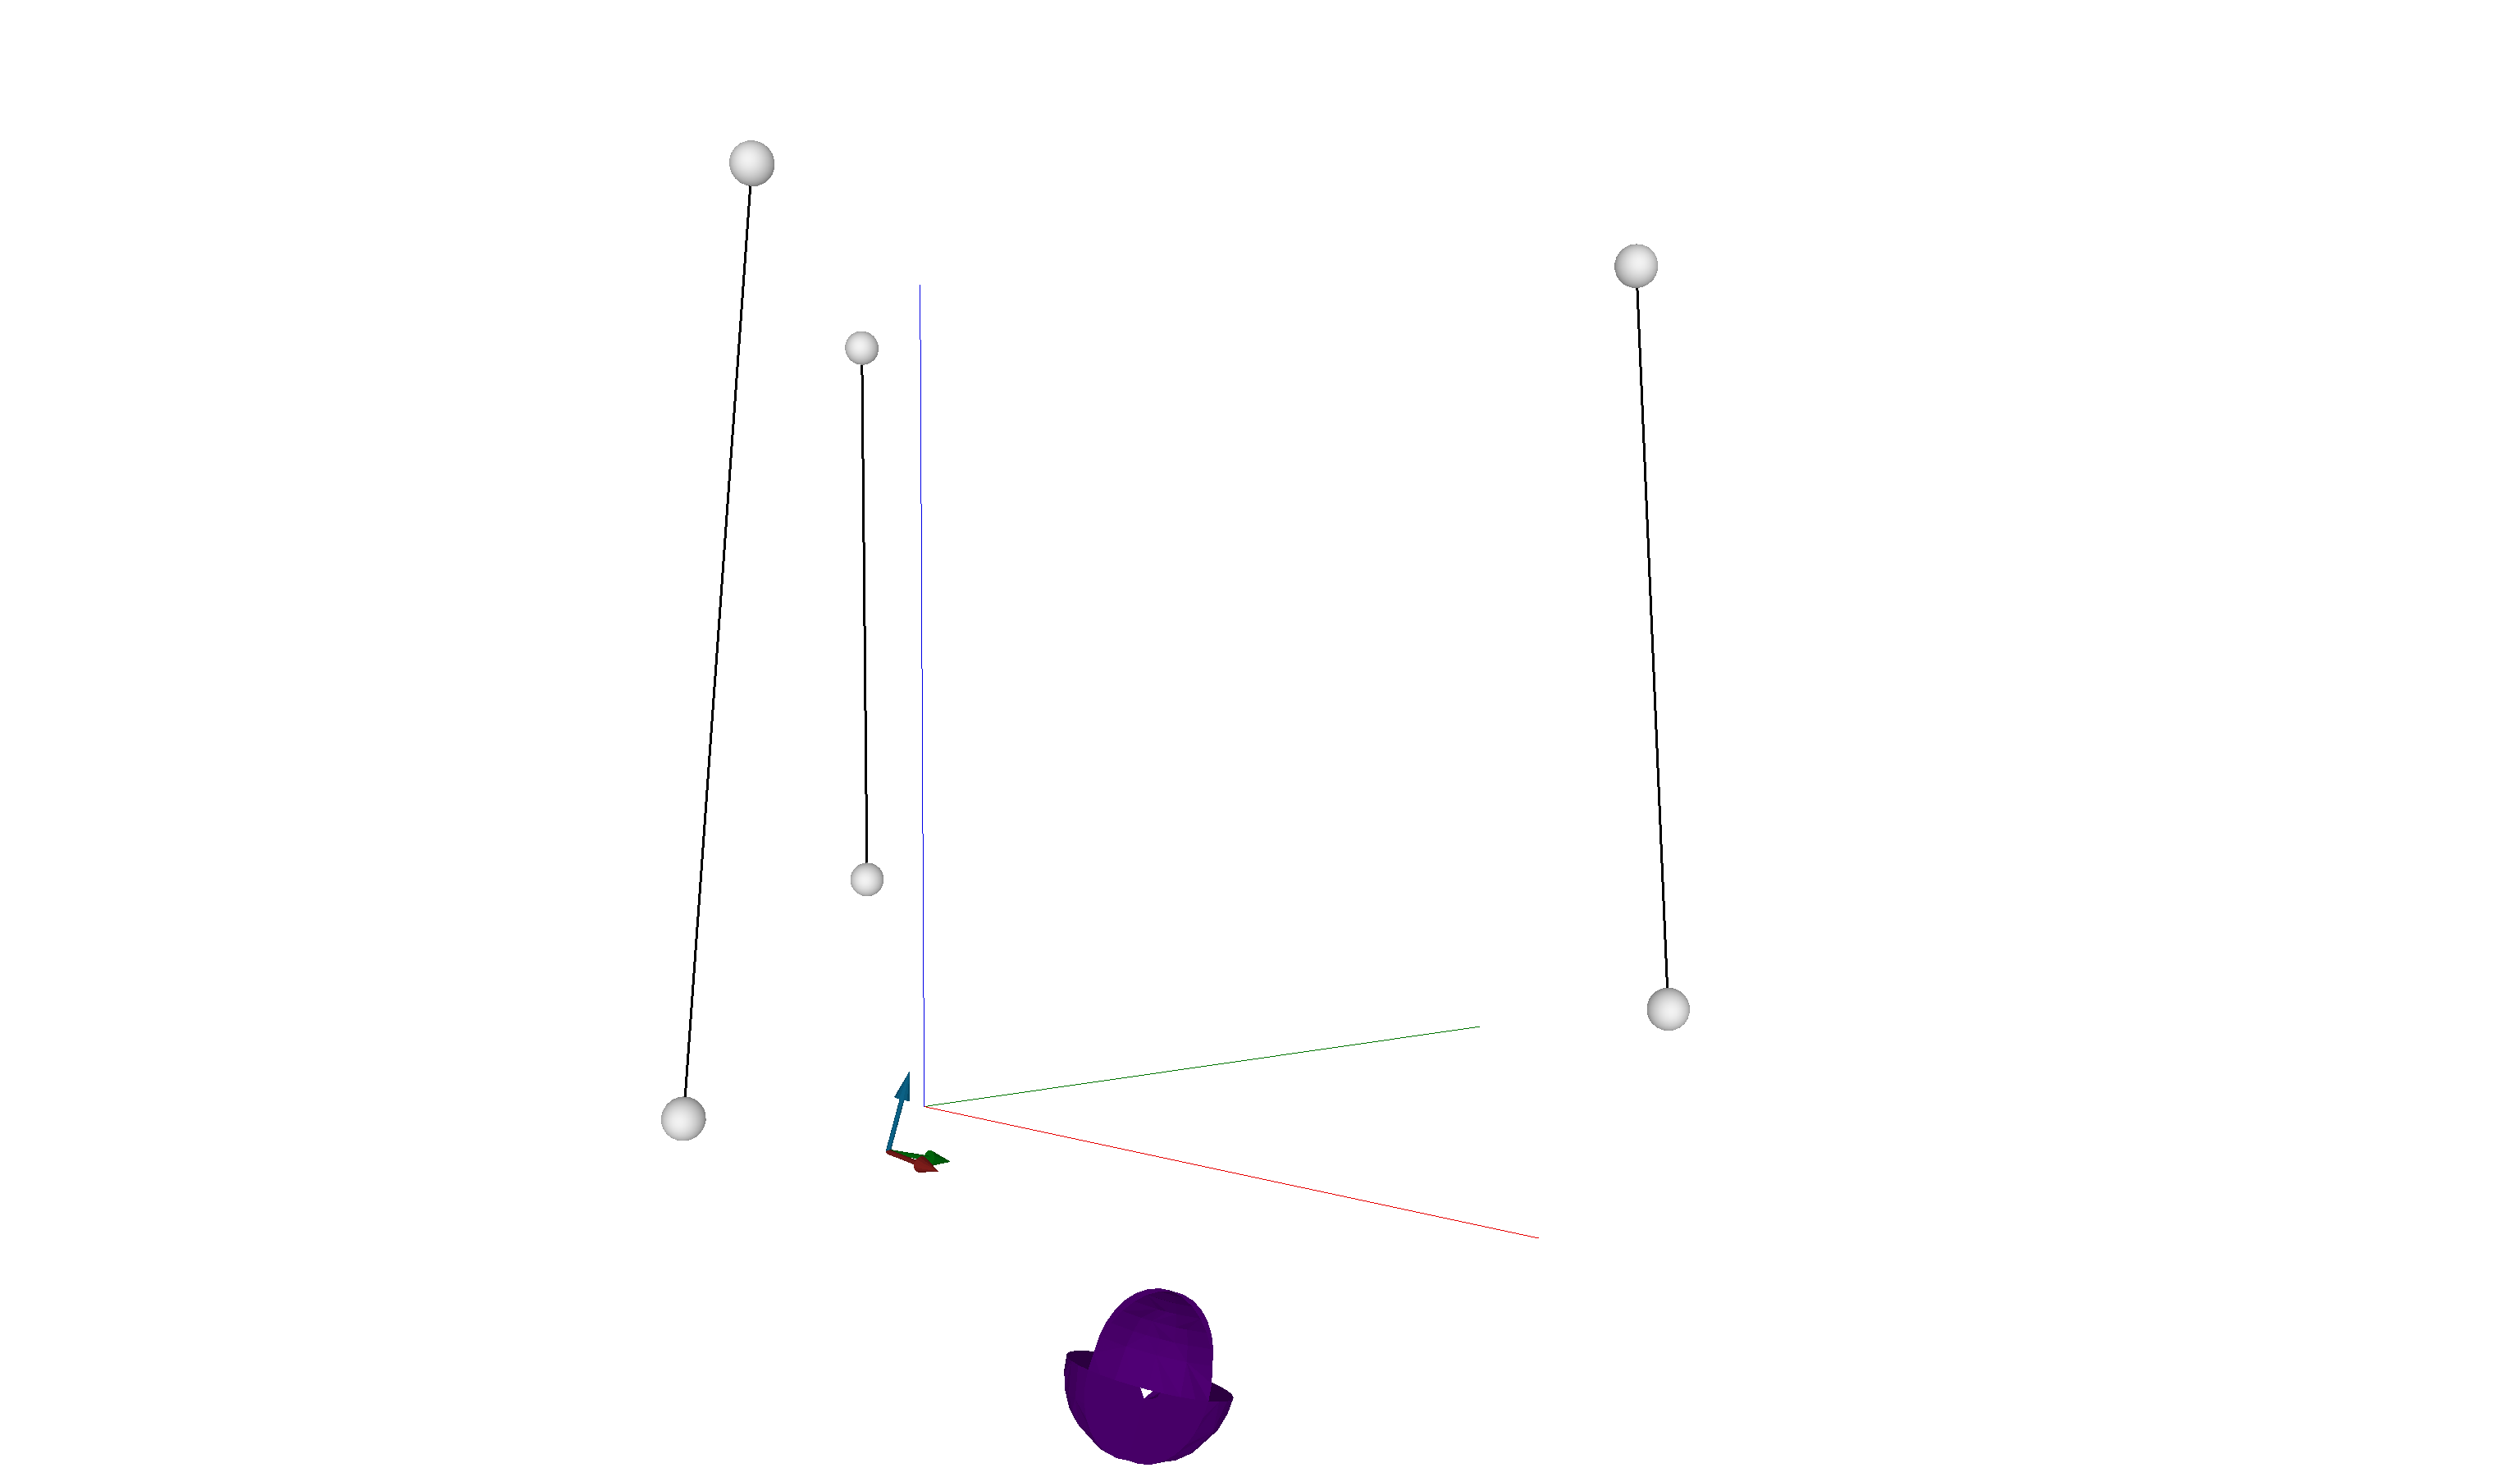

In [6]:
from DAVE.jupyter import *
show(s, sea = False, camera_pos = (27.76337383340547, -20.104069593345237, 5.912761778010189), lookat = (3.2308766177977186, 2.6085609885763255, 4.531373097710178), force_normalize = True, force_scale = 1.6, cog_scale = 1)

In [3]:
# view(s)  # for interactive view

The model consists of a single body suspended from three cables. All cables have different stiffnesses:

In [11]:
report(s['Cable1'],['EA','length'])

Property,Value,Unit,Remarks,Explained
length,10.000,m,,Length of the cable when in rest
EA,400.000,kN,,Stiffness of the cable


In [13]:
report(s['Cable2'],['EA','length'])

Property,Value,Unit,Remarks,Explained
length,6.000,m,,Length of the cable when in rest
EA,100.000,kN,,Stiffness of the cable


In [14]:
report(s['Cable3'],['EA','length'])

Property,Value,Unit,Remarks,Explained
length,7.000,m,,Length of the cable when in rest
EA,200.000,kN,,Stiffness of the cable


## Orcaflex

This model can be exported to an orcaflex .yml model file.

If you have orcaflex on this computer then DAVE will use the OrcFxAPI to open the model, solve statics and summarize the static results. The static results are returned as a dict.

This only runs if you have orcaflex and an available license.


In [16]:
from DAVE.io.orcaflex import *

# If the orcaflex/python configuration on your pc is not properly configured then you may need to manually add the path to the orcaflex api. This is done here
import sys
sys.path.append(r'C:\Program Files (x86)\Orcina\OrcaFlex\10.2\OrcFxAPI\Python')

try:
    ofx_results = run_statics_collect(s, filename = r'3plift.yml')
except Exception as E:
    print(E)

Written C:\Users\beneden\AppData\Local\Temp\ofx_dave_runfile.py to run 3plift.yml and save resuts as 3plift_sum.yml
No module named 'OrcFxAPI'


Now it is possible that you, like me, do not have orcaflex. In that case the previous cell resulted in an error like "No module named 'OrcFxAPI' "

## What if you do not have Orcaflex

- You can still download the orcaflex demo to open and view the .yml model file


![screenshot](screenshot_3p.png)

    - All the body has been exported as a 6D buoy
    - The cables have been exported as winches

- You can give the model to somebody who has orcaflex and ask nicely if they can run it for you using the created .py file
- You can then load the model_sum.yml file directly.


In [17]:
ofx_results = r'3plift_sum.yml' # this step can be skipped if the previous cell ran without errors

There is a small utility fuction to compare the orcaflex static results to the results in the DAVE model. ofx_results may be a results dictionary or a modelname_sum.yml file

In [18]:
comparison = compare_statics(s, ofx_results)

FileNotFoundError: [Errno 2] No such file or directory: '3plift_sum.yml'

To nicely display the result dictionary we convert it to a pandas dataframe. Just a quick trick to make a table.

In [19]:
import pandas as pd
pd.DataFrame.from_dict(comparison)

NameError: name 'comparison' is not defined

The results are comparable enough to conclude that both programs agree on the equilibrium positions and tensions. They are also different enough to confirm that they are really originate from different programs.

---